In [38]:
#Trabalhando com Excel no Pandas

In [39]:
import pandas as pd

In [40]:
df1 = pd.read_excel('/content/drive/MyDrive/Análise da dados com Pandas e Python/datasets/Aracaju.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/Análise da dados com Pandas e Python/datasets/Fortaleza.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/Análise da dados com Pandas e Python/datasets/Natal.xlsx')
df4 = pd.read_excel('/content/drive/MyDrive/Análise da dados com Pandas e Python/datasets/Recife.xlsx')
df5 = pd.read_excel('/content/drive/MyDrive/Análise da dados com Pandas e Python/datasets/Salvador.xlsx')

In [41]:
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [42]:
#unindo todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [43]:
#Exibir as 5 primeiras linhas -- o default são as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [44]:
#exibir as 5 ultimas linhas -- tambem o default sao as 5 ultimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [45]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
12,Salvador,2019-01-01,125.05,1034,3
49,Aracaju,2018-01-01,53.74,1522,3
106,Aracaju,2018-01-01,16.32,1520,7
121,Aracaju,2018-01-01,162.07,1520,3
9,Recife,2019-01-01,11.85,980,7


In [46]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
53,Recife,2019-01-01,37.05,983,6
25,Salvador,2019-01-01,220.62,1035,1
117,Fortaleza,2019-03-02,15.42,983,8
30,Salvador,2019-01-01,47.96,1034,2
187,Natal,2019-01-02,3.85,1035,3


In [47]:
#Informa o tipo do dados em cada coluna 
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [48]:
#alterando o tipo dos dados de uma determinada coluna
df['LojaID'] = df['LojaID'].astype('object')

In [49]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [50]:
#Tratando valores nulos(faltantes)

In [51]:
#Consultando valores nulos
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [52]:
#exemplo substituir valores nulos pela media de vendas
df['Vendas'].fillna(df['Vendas'].mean(), inplace = True)

In [53]:
df['Vendas'].mean()

122.61180089485438

In [54]:
#exemplo substituindo valores nulos por zero
df['Vendas'].fillna(0, inplace = True)

In [55]:
#exemplo apagando linhas com valores nulos
df.dropna(inplace=True)

In [56]:
#exemplo apagando linhas com valores nulos com base em uma coluna
df.dropna(subset=['Vendas'], inplace=True)

In [57]:
#exemplo remover linhas com valores faltantes em todas as colunas
df.dropna(how='all', inplace=True) 

In [58]:
#Criando novas colunas -- criando coluna receita
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [59]:
df['Receita/Vendas'] = df['Receita'] / df['Vendas']

In [60]:
#Retornando a maior receita
df['Receita'].max()

3544.0

In [61]:
#Retornando a menor receita
df['Receita'].min()

3.34

In [62]:
#nlargest -- retorna as maiores receitas nesse caso 
df.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [63]:
#nsmallest -- retorna as menores receitas nesse caso
df.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [64]:
#Agrupando por cidade
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [65]:
#Ordenando o resultado por um determinado campo -- ascending = false do maior para o menor
df.sort_values('Receita', ascending=False).head(10)


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


In [67]:
  #Trabalhando com datas -- transformando a coluna data em tipo inteiro
  df['Data'] = df['Data'].astype('int64')

In [68]:
#verificando o tipo de dados de cada coluna
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [69]:
# Transformando coluna de data em data
df['Data'] = pd.to_datetime(df['Data'])

In [70]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [72]:
#Agrupamento receita por ano
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [73]:
#Criando uma nova coluna com o ano
df['Ano Venda'] = df['Data'].dt.year

In [74]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano Venda
70,Salvador,2019-01-01,39.06,1034,3,117.18,3.0,2019
121,Fortaleza,2019-03-02,41.55,981,3,124.65,3.0,2019
114,Aracaju,2018-01-01,10.17,1520,5,50.85,5.0,2018
138,Recife,2019-03-02,150.38,983,6,902.28,6.0,2019
186,Salvador,2019-01-02,169.09,1036,2,338.18,2.0,2019


In [75]:
#Extraindo dia e venda
df['Mes Venda'], df['Dia Venda'] = (df['Data'].dt.month, df['Data'].dt.day)

In [76]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano Venda,Mes Venda,Dia Venda
115,Aracaju,2018-01-01,50.99,1522,10,509.90,10.0,2018,1,1
169,Salvador,2019-01-02,166.73,1037,2,333.46,2.0,2019,1,2
9,Natal,2018-05-02,261.00,852,3,783.00,3.0,2018,5,2
66,Aracaju,2018-01-01,76.59,1523,4,306.36,4.0,2018,1,1
134,Fortaleza,2019-03-02,195.18,980,5,975.90,5.0,2019,3,2


In [77]:
#Calculando a data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [78]:
#Calculando a diferença entre dias
df['Diferenca Dias'] = df['Data'] - df['Data'].min()

In [79]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano Venda,Mes Venda,Dia Venda,Diferenca Dias
134,Fortaleza,2019-03-02,195.18,980,5,975.90,5.0,2019,3,2,425 days
117,Salvador,2019-03-02,39.41,1034,1,39.41,1.0,2019,3,2,425 days
103,Aracaju,2018-01-01,12.62,1522,3,37.86,3.0,2018,1,1,0 days
97,Recife,2019-01-01,153.04,983,4,612.16,4.0,2019,1,1,365 days
193,Natal,2019-01-02,3.97,1036,2,7.94,2.0,2019,1,2,366 days


In [81]:
#Criando a coluna trimestre
df['Trimestre Vendas'] = df['Data'].dt.quarter

In [82]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano Venda,Mes Venda,Dia Venda,Diferenca Dias,Trimestre Vendas
114,Salvador,2019-03-02,25.52,1034,1,25.52,1.0,2019,3,2,425 days,1
7,Aracaju,2019-01-01,172.22,1522,6,1033.32,6.0,2019,1,1,365 days,1
68,Salvador,2019-01-01,162.35,1037,3,487.05,3.0,2019,1,1,365 days,1
124,Natal,2019-01-02,44.82,1034,3,134.46,3.0,2019,1,2,366 days,1
57,Natal,2019-02-24,425.00,854,4,1700.00,4.0,2019,2,24,419 days,1


In [83]:
#Filtrando as vendas de março de 2019
vendas_marco_2019 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)] 

In [84]:
vendas_marco_2019

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano Venda,Mes Venda,Dia Venda,Diferenca Dias,Trimestre Vendas
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


In [ ]:
#Visualizaçao de dados
df['LojaID'].value_counts(ascending=False)

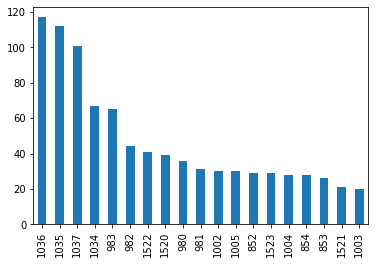

In [86]:
#Gráfico em barras
df['LojaID'].value_counts(ascending=False).plot.bar()

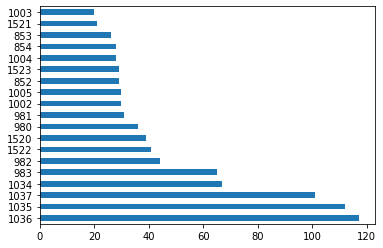

In [89]:
#Grafico barras horizontais
df['LojaID'].value_counts(ascending=False).plot.barh();

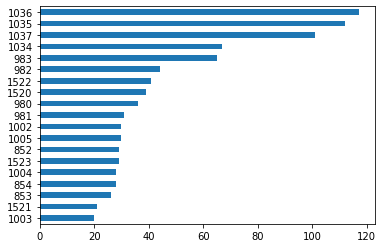

In [90]:
#Grafico barras horizontais
df['LojaID'].value_counts(ascending=True).plot.barh();

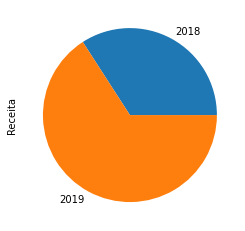

In [92]:
#Grafico Pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie();

In [94]:
#Total vendas cidade
df['Cidade'].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

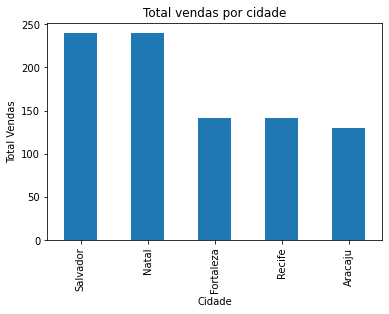

In [96]:
#Adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total vendas por cidade')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas');

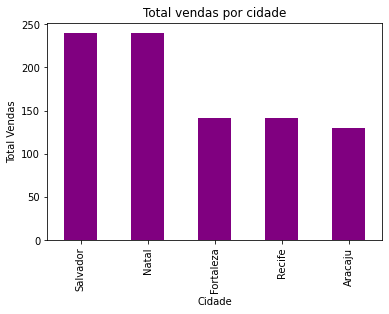

In [97]:
#Alterando a cor
df['Cidade'].value_counts().plot.bar(title='Total vendas por cidade', color = 'purple')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas');

In [98]:
#Alterando o estilo
plt.style.use('ggplot')

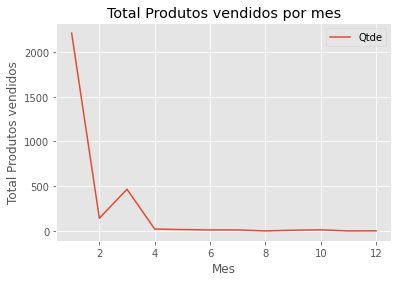

In [100]:
df.groupby(df['Mes Venda'])['Qtde'].sum().plot(title = 'Total Produtos vendidos por mes')
plt.xlabel('Mes')
plt.ylabel('Total Produtos vendidos')
plt.legend();

In [ ]:
df.groupby(df['Mes Venda'])['Qtde'].sum()

In [105]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df['Ano Venda'] == 2019]

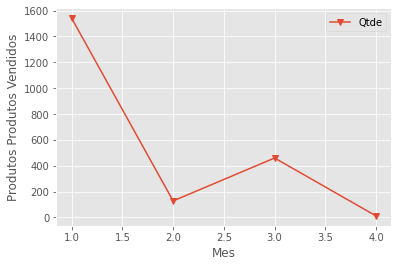

In [106]:
#Total produtos vendidos por mes
df_2019.groupby(df_2019['Mes Venda'])['Qtde'].sum().plot(marker = 'v')
plt.xlabel('Mes')
plt.ylabel('Produtos Produtos Vendidos')
plt.legend();

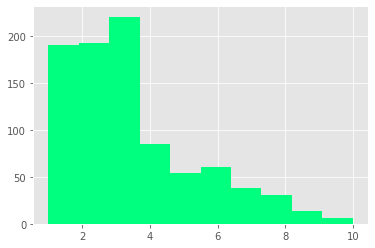

In [108]:
#Histograma
plt.hist(df['Qtde'], color='springgreen');

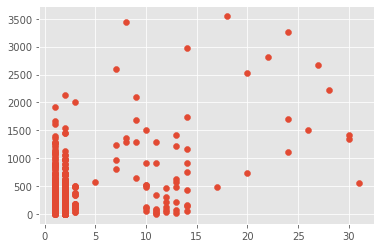

In [109]:
plt.scatter(x=df_2019['Dia Venda'], y = df_2019['Receita']);

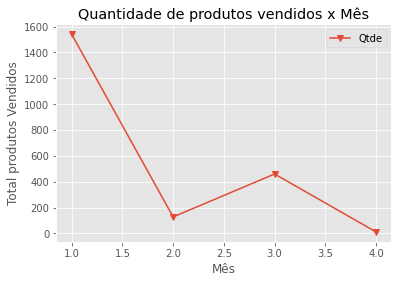

In [110]:
#salvando em png
df_2019.groupby(df_2019['Mes Venda'])['Qtde'].sum().plot(marker = 'v')
plt.title('Quantidade de produtos vendidos x Mês')
plt.xlabel('Mês')
plt.ylabel('Total produtos Vendidos')
plt.legend()
plt.savefig('Gráfico QTDE x MES.png')